# EDA

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 140)

df = pd.read_csv('./data/tweet-clean.csv')
df.head()

,id,name,username,date,reply_to,content,reply,retweet,like,lang,mentions,content_clean
0,DedenSujanaFeb12021Simak b,Deden Sujana,@dedensujana,2021-02-01,NaN,Simak bagaimana sikap Khilafah Ahmadiyah terhadap Pancasila dan Demokrasi dalam link di bawah ini :\n@Iskandargumay1,0,1,2,id,@Iskandargumay1,Simak bagaimana sikap Khilafah Ahmadiyah terhadap Pancasila dan Demokrasi dalam link di bawah ini :
1,MuridIslamAhmadiyahFeb12021nah say,MuridIslamAhmadiyah,@MAhmadiyah,2021-02-01,@akbarnugrohoa,"nah saya ulang ya. silahkan temukan pernyataan dari Ahmadiyah langsung, bahwa nabi terakhir/penutup adala Ghulam Ahmad.",1,0,0,id,NaN,"nah saya ulang ya. silahkan temukan pernyataan dari Ahmadiyah langsung, bahwa nabi terakhir/penutup adala Ghulam Ahmad."
2,risrisismanFeb12021Sebenar,risris isman,@risrisus,2021-02-01,@susipudjiastuti,"Sebenarnya mengomentari \n@permadiaktivis1\n lebih politis dari pada bicara HAM, mana berani para politikus menaggapi apalagi bersuara l...",0,0,1,id,@permadiaktivis1,"Sebenarnya mengomentari lebih politis dari pada bicara HAM, mana berani para politikus menaggapi apalagi bersuara lantang tentang kasus ..."
3,MuridIslamAhmadiyahJan312021adakah,MuridIslamAhmadiyah,@MAhmadiyah,2021-01-31,@akbarnugrohoa,adakah pernyataan dari Ahmadiyah bahwa nabi penutup adalah Bukan Muhammad melainkan Mirza Ghulam Ahmad? silahkan tunjukan disini,0,0,0,id,NaN,adakah pernyataan dari Ahmadiyah bahwa nabi penutup adalah Bukan Muhammad melainkan Mirza Ghulam Ahmad? silahkan tunjukan disini
4,MuridIslamAhmadiyahJan312021itu vid,MuridIslamAhmadiyah,@MAhmadiyah,2021-01-31,@akbarnugrohoa,"itu video udh video udh menjelaskan penafsiran ahmadiyah soal Al-Azhab : 40 , malah dibilang ga bisa jelasin ok kalau ada pertanyaan soa...",1,0,0,id,NaN,"itu video udh video udh menjelaskan penafsiran ahmadiyah soal Al-Azhab : 40 , malah dibilang ga bisa jelasin ok kalau ada pertanyaan soa..."


## Username

In [2]:
print(f'Jumlah username unik: {len(df.name.value_counts().index)}')

Jumlah username unik: 5591


In [3]:
users = df.name.value_counts().index.values
sample_tweet = df[['name', 'content']][df.name.isin(users)]
sample_tweet = sample_tweet.drop_duplicates(subset='name')
df_users = pd.DataFrame({
    'nama': df.name.value_counts().index,
    'jumlah_tweet': df.name.value_counts().values,
    'sample': sample_tweet.content.values,
}, index=[i for i in range(len(users))])
df_users.head(10)

,nama,jumlah_tweet,sample
0,MuridIslamAhmadiyah,828,Simak bagaimana sikap Khilafah Ahmadiyah terhadap Pancasila dan Demokrasi dalam link di bawah ini :\n@Iskandargumay1
1,Deden Sujana,318,"nah saya ulang ya. silahkan temukan pernyataan dari Ahmadiyah langsung, bahwa nabi terakhir/penutup adala Ghulam Ahmad."
2,bill temporo,298,"Sebenarnya mengomentari \n@permadiaktivis1\n lebih politis dari pada bicara HAM, mana berani para politikus menaggapi apalagi bersuara l..."
3,Ahmadiyah Indonesia,214,Pengajian Mingguan Online\n\nTajuk: Tahrik Waqf-e-Nau\n\nDibawakan oleh: \nDepartment Tarbiyat Nasional\nJamaat Ahmadiyah Mulsim Malaysia
4,Iman Mubarak Ahmad,99,Widih rizik rasis k cina syiah dan ahmadiyah apa mau lo hantam pake palu jg?\nKadrun model lo yg rasis k cina syiah dan ahmadiyah apa ma...
5,IG: WarungSejarahRI,81,"banyak juga yaa. ini kalo di islam semacam nu, muhammadiyah, ahbandiyah, ahmadiyah, ldii dsb gitu gak sih?"
6,نانانگ سلمان,63,"saya menolak paham ahmadiyah berdasarkan ilmu, bukan hawa nafsu"
7,Nasrun Aminullah Muchtar,55,Kalau Ahmadiyah dan Syiah bagaimana?
8,iLba,54,Kunjungan Intel Kodim 0703 ke Rumah Mubaligh Ahmadiyah Cilacap\n\nhttps://ayahakbar.id/2021/01/31/kunjungan-intel-kodim-0703-ke-rumah-mu...
9,Aphrodite Celestamine Prune,54,"Mirza ghulam ahmad,seorang tokoh robbaniawan islam dari Qadian ,India. Dia adalah pendiri sebuah gerakan keagamaan dalam islam,Ahmadiyah..."


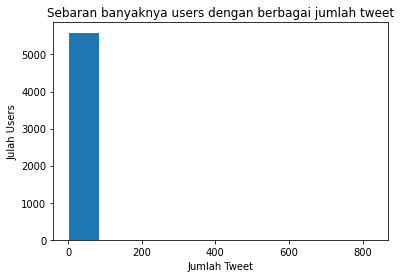

In [4]:
import matplotlib.pyplot as plt

ax = plt.hist(df_users.jumlah_tweet)
plt.title("Sebaran banyaknya users dengan berbagai jumlah tweet")
plt.xlabel("Jumlah Tweet")
plt.ylabel("Julah Users")
plt.show()

In [15]:
peruser = df.groupby('name')[['reply', 'retweet', 'like']].sum()
peruser['tweet'] = df.groupby('name')['content'].count().values
peruser.sort_values('tweet', ascending=False).head(10)

,reply,retweet,like,tweet
name,,,,
MuridIslamAhmadiyah,668,86,124,828
Deden Sujana,82,271,791,318
bill temporo,0,0,0,298
Ahmadiyah Indonesia,187,2453,2615,214
Iman Mubarak Ahmad,30,50,124,99
IG: WarungSejarahRI,1,1,25,81
نانانگ سلمان,28,27,51,63
Nasrun Aminullah Muchtar,24,75,183,55
Aphrodite Celestamine Prune,9,3,12,54


In [16]:
peruser.sort_values('reply', ascending=False).head(10)

,reply,retweet,like,tweet
name,,,,
OposisiCerdas.com,868,738,2204,15
MuridIslamAhmadiyah,668,86,124,828
Buya Eson,492,1233,4050,7
indri Yahya⚘,488,736,2343,17
Alissa Wahid,462,1944,4395,4
BIBIB KADRUN ..,452,490,1850,2
Saidiman Ahmad,419,1198,2016,11
Eko Kuntadhi,373,964,4112,5
Akmal Sjafril,344,1730,4178,3


In [17]:
peruser.sort_values('retweet', ascending=False).head(10)

,reply,retweet,like,tweet
name,,,,
Ahmadiyah Indonesia,187,2453,2615,214
Alissa Wahid,462,1944,4395,4
Akmal Sjafril,344,1730,4178,3
Buya Eson,492,1233,4050,7
Saidiman Ahmad,419,1198,2016,11
Barack Aziz Malinggi,56,1120,1575,2
𝗠𝘂𝘀𝗹𝗶𝗺 𝗖𝘆𝗯𝗲𝗿 𝗔𝗿𝗺𝘆,72,996,3398,8
Eko Kuntadhi,373,964,4112,5
OposisiCerdas.com,868,738,2204,15


In [18]:
peruser.sort_values('like', ascending=False).head(10)

,reply,retweet,like,tweet
name,,,,
Alissa Wahid,462,1944,4395,4
Akmal Sjafril,344,1730,4178,3
Eko Kuntadhi,373,964,4112,5
Buya Eson,492,1233,4050,7
Taufik Damas,203,621,3425,21
𝗠𝘂𝘀𝗹𝗶𝗺 𝗖𝘆𝗯𝗲𝗿 𝗔𝗿𝗺𝘆,72,996,3398,8
Ahmadiyah Indonesia,187,2453,2615,214
indri Yahya⚘,488,736,2343,17
OposisiCerdas.com,868,738,2204,15


## Date

In [5]:
df_date = df.sort_values('date').reset_index(drop=True)
df_date = df_date[['date', 'content']]
df_date = df_date.set_index('date')
df_date = df_date.loc['2021-01':'2022-01']
df_date = df_date.reset_index()
df_date

,date,content
0,2021-01-01,"Pak HNW, kalau pakai pendekatan HAM knp gak mempertanyakan hal yg sama ketika kekerasan pada kelompok lain yang berbeda, seperti Ahmadiy..."
1,2021-01-01,-punten semoga bem yang katanya membela rakyat yang tertindas nggak ikut persekusi syiah & ahmadiyah :)
2,2021-01-01,gatau gan saya ahmadiyah
3,2021-01-01,"Senjata makan tuan,karena tuan terlalu jumawa sehingga kurang pikir diri,dengan skb 2 menteri persekusi Ahmadiyah dan syiah ,skb 6 mente..."
4,2021-01-01,Keyakinan elu tentang aduan masy kan hanya keyakinan elu doang. Kl aduan masy knp HANYA DI BULAN PUASA yg tdk blh jual miras. Dan key el...
...,...,...
13608,2021-12-31,"Loo banyak bacot nyaa boss, kasus Ahmadiyah lo ngiring aja ndk betul apa lagii mau ngurusin yg beginian\nDoyan amat sih fitnah org\nTele..."
13609,2021-12-31,Ahmadiyah dong
13610,2021-12-31,syiah\nahmadiyah\npenyusup-nyamar
13611,2021-12-31,"benar sekali, ini kelompok dmn pun berada selalu akan membuat masalah, bahkan mrk menghalalkan darah org muslim (yg tdk sejalan dengan m..."


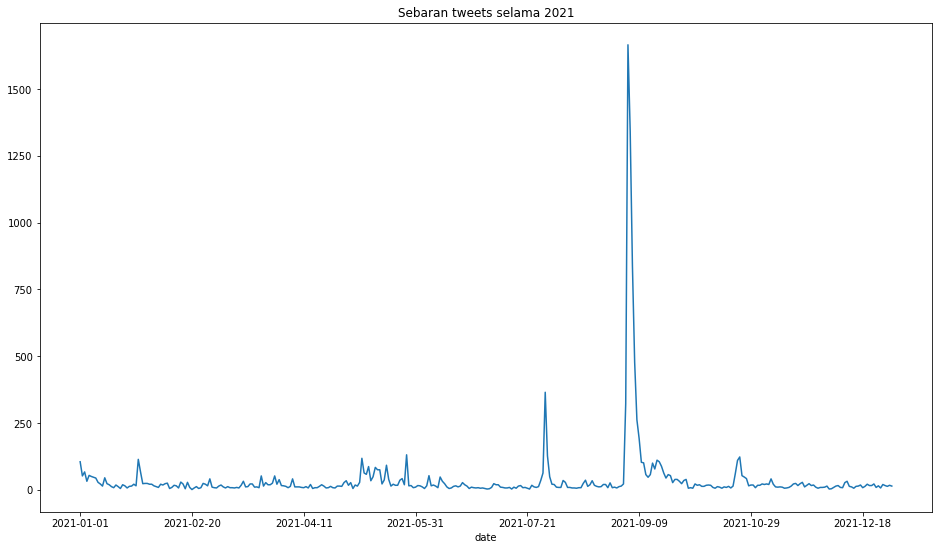

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 9))
df_date.groupby('date')['content'].count().plot(kind='line')
plt.title("Sebaran tweets selama 2021")
plt.show()

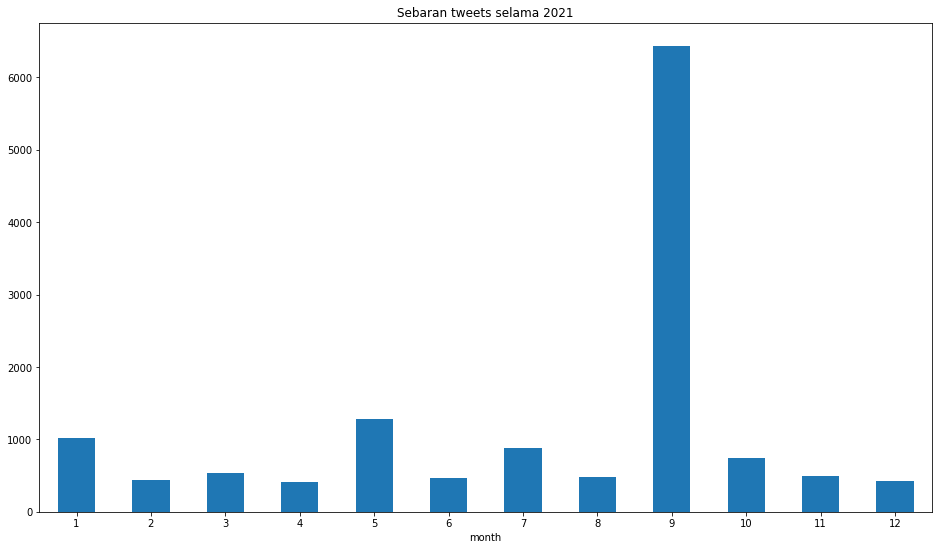

In [7]:
df_date['date'] = pd.to_datetime(df_date.date)
df_date['month'] = df_date.date.dt.month
fig = plt.figure(figsize=(16, 9))
# plt.style.use("ggplot")
df_date.groupby('month')['content'].count().plot(kind='bar')
plt.title("Sebaran tweets selama 2021")
plt.xticks(rotation=0)
plt.show()

4418     Rajin Bercuit Covid-19, Dokter AS Faheem Younus Disebut Pengikut Ahmadiyah, Netizen Ribut
5961                           Komnas HAM Sebut Perusakan Masjid Ahmadiyah di Kalbar Melanggar HAM
6283                     Masjid Ahmadiyah Dibakar Massa, Satkornas Banser Keluarkan Tiga Instruksi
7009      Menag Gus Yaqut Kecam Pembakaran Masjid Ahmadiyah: Ancaman Nyata Kerukunan Umat Beragama
7128            Mahfud MD Minta Kapolda dan Gubernur Kalbar Usut Tuntas Perusakan Masjid Ahmadiyah
7368         Masjid Ahmadiyah Dibakar Massa, Putri Gus Dur: Apa Praktik Ini Dibiarkan, Pak Jokowi?
7970      Respons Pembakaran Masjid Ahmadiyah, PA 212: Itu Reaksi Umat Atas Pembiaran Aliran Sesat
8983                                                     Banser Akan Jaga Masjid Ahmadiyah Sintang
10194    Cholil Nafis Tak Setuju Masjid Ahmadiyah Dibakar, Walaupun Aqidahnya Dinyatakan Sesat MUI
10562                         MUI Tak Setuju Komnas HAM: SKB 3/2008 Lindungi Ahmadiyah-Umat Islam!
10613     